In [9]:
import pandas as pd
import os 

In [15]:
#Leer la carpeta "batches"
path = "../batches"
files = os.listdir(path)
#Leer los archivos de la carpeta "batches"
df = pd.concat([pd.read_csv(os.path.join(path, file)) for file in files])
#Guardar el archivo en formato csv
df.to_csv("../batches/batches_concatenate.csv", index=False)

In [16]:
df.head()

,index,Formula,Phase,Elem1,Elem2,Elem3,Elem4,Elem5,Elem6,Elem7,Elem8,CantElemen,Compo1,Compo2,Compo3,Compo4,Compo5,Compo6,Compo7,Compo8
0,18.0,Al20Zr80,CRA,Al,Zr,0,0,0,0,0,0,2,20.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36.0,Al50Gd50,RMG,Al,Gd,0,0,0,0,0,0,2,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37.0,Al50La50,RMG,Al,La,0,0,0,0,0,0,2,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0
3,44.0,Al60Ti40,CRA,Al,Ti,0,0,0,0,0,0,2,60.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
4,74.0,Al88Cr12,CRA,Al,Cr,0,0,0,0,0,0,2,88.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#Leer el archivo de "TablaPeriodica.csv"
df_tabla_periodica = pd.read_csv("../Inputs/TablaPeriodica.csv", sep=";")
df_tabla_periodica.head()

,Element,Eea (ev),I1 (ev),I2 (ev),Tm (K),AW,AN,Rm (nm),Rc (nm),Gp,...,dVEC,XP,XM,Cp (J/molK),K (W/m)/K 300K,W,D,Hf (kJ/mol),LP,Tb (K)
0,Ag,1.3040,7.576,2.145.411,1234.93,107.87,47,0.1445,0.145,11,...,10,1.93,1.83,25.350,429.0,4.64,10.50,11.30,18.005,2435.15
1,Al,0.4328,5.986,1.882.883,933.47,2.698.154,13,0.1432,0.121,13,...,0,1.61,1.37,24.200,237.0,4.19,2.70,10.79,16.472,2792.15
2,Au,2.3090,9.226,2.052.132,1337.33,196.97,79,0.1442,0.136,11,...,10,2.54,2.33,25.418,317.0,5.32,19.30,12.55,18.145,3129.15
3,B,0.2800,8.298,2.515.521,2349.15,10.81,5,0.0820,0.084,13,...,0,2.04,1.77,11.087,27.0,4.75,2.34,50.20,86.991,4200.15
4,Ba,0.1450,5.212,1.000.363,1000.15,137.33,56,0.2176,0.215,2,...,0,0.89,1.17,28.070,18.4,2.35,3.62,7.75,63.643,2170.15


In [17]:
for i in range(1, 9):
    # Realizar el "merge" entre df1 y df2 en función de las columnas de elementos
    df = df.merge(df_tabla_periodica, left_on=f"Elem{i}", right_on="Element", how="left")
print('Cantidad de registros:', len(df))
print('Cantidad de columnas:', len(df.columns))
df.head()

Cantidad de registros: 6415
Cantidad de columnas: 212


/tmp/ipykernel_2738/1179277899.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'pVEC_x', 'P_x', 'XM_x', 'Hf (kJ/mol)_x', 'Eea (ev)_x', 'Element_x', 'AN_x', 'W_x', 'Rc (nm)_x', 'sVEC_x', 'I1 (ev)_x', 'I2 (ev)_x', 'XP_x', 'LP_x', 'dVEC_x', 'Cp (J/molK)_x', 'AW_x', 'Gp_x', 'Tm (K)_x', 'Rm (nm)_x', 'K (W/m)/K 300K_x', 'D_x', 'VEC_x', 'Tb (K)_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_tabla_periodica, left_on=f"Elem{i}", right_on="Element", how="left")
/tmp/ipykernel_2738/1179277899.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'pVEC_x', 'P_x', 'XM_x', 'Hf (kJ/mol)_x', 'Eea (ev)_x', 'Element_x', 'AN_x', 'W_x', 'Rc (nm)_x', 'sVEC_x', 'I1 (ev)_x', 'I2 (ev)_x', 'XP_x', 'LP_x', 'dVEC_x', 'Cp (J/molK)_x', 'AW_x', 'Gp_x', 'Tm (K)_x', 'Rm (nm)_x', 'K (W/m)/K 300K_x', 'D_x', 'VEC_x', 'Tb (K)_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_tabla

,index,Formula,Phase,Elem1,Elem2,Elem3,Elem4,Elem5,Elem6,Elem7,...,dVEC_y,XP_y,XM_y,Cp (J/molK)_y,K (W/m)/K 300K_y,W_y,D_y,Hf (kJ/mol)_y,LP_y,Tb (K)_y
0,18.0,Al20Zr80,CRA,Al,Zr,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36.0,Al50Gd50,RMG,Al,Gd,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37.0,Al50La50,RMG,Al,La,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,44.0,Al60Ti40,CRA,Al,Ti,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,74.0,Al88Cr12,CRA,Al,Cr,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Eliminar las columnas que no se necesitan
df = df.drop(columns=["Elem1", "Elem2", "Elem3", "Elem4", "Elem5", "Elem6", "Elem7", "Elem8", "Element_x", "index", "Formula", "CantElemen"])

In [19]:
df_total = df.copy()

In [20]:
#Tipos de la columna "Phase"
print(df_total["Phase"].unique())
#Reemplazar BMG por 0, RMG por 1 y CRA por 2
df_total["Phase"] = df_total["Phase"].replace({"BMG": 0, "RMG": 1, "CRA": 2})
#Tipos de la columna "Phase"
print(df_total["Phase"].unique())

['CRA' 'RMG' 'BMG']
[2 1 0]


In [21]:
#Exportar el df_total a un archivo csv
df_total.to_csv("../model/total_data.csv", index=False)

In [22]:
#La etiqueta de la columna "Phase"
y = df_total["Phase"]
#Las características de las columnas
X = df_total.drop(columns=["Phase"])


In [23]:
from sklearn.model_selection import train_test_split
#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
#Convertir el X_train y X_test en números
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [25]:
#Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:980: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:1005: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [26]:
#Fillna
X_train_scaled = pd.DataFrame(X_train_scaled).fillna(0)
X_test_scaled = pd.DataFrame(X_test_scaled).fillna(0)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Crear el modelo
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
#Entrenar el modelo
model.fit(X_train_scaled, y_train)
#Predecir con el modelo
y_pred = model.predict(X_test_scaled)

Accuracy score:  0.8238503507404521
Reporte de clasificación: 
              precision    recall  f1-score   support

           0       1.00      0.91      0.96       221
           1       0.81      0.92      0.86       779
           2       0.69      0.48      0.57       283

    accuracy                           0.82      1283
   macro avg       0.84      0.77      0.80      1283
weighted avg       0.82      0.82      0.81      1283

Matriz de confusión: 
[[202  19   0]
 [  0 719  60]
 [  0 147 136]]


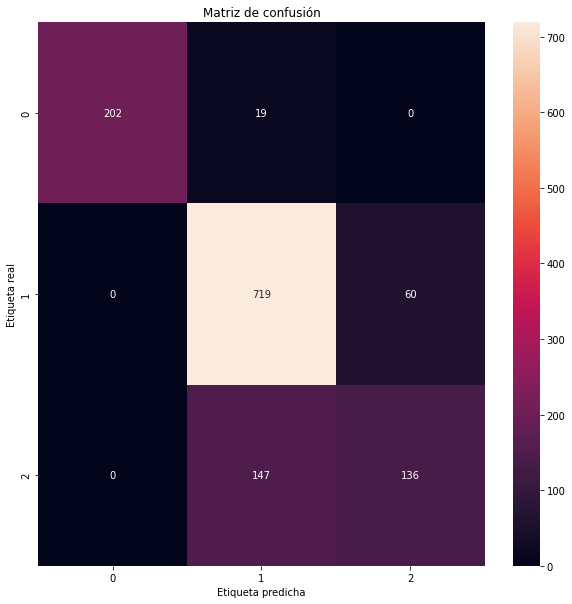

In [28]:
#Calcular la precisión del modelo
print('Accuracy score: ', accuracy_score(y_test, y_pred))
#Reporte de clasificación
print('Reporte de clasificación: ')
print(classification_report(y_test, y_pred))

#Matriz de confusión
print('Matriz de confusión: ')
print(confusion_matrix(y_test, y_pred))

#Gráficar la matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Matriz de confusión")
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

In [29]:
#Guardado del modelo
import pickle
pickle.dump(model, open("../model/model.pkl", "wb"))


In [30]:
import pickle
#Cargar el modelo
model = pickle.load(open("../model/model.pkl", "rb"))

In [31]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
#Cantidad de registros en el X_test_scaled
print('Cantidad de registros: ', len(X_test_scaled))
#Dividir el X_test_scaled de a 10 registros
errores_list = []
#Iterar y tomar cada 10 registros
for i in range(0, len(X_test_scaled), 10):
    #Tomar los 10 registros
    X_test_scaled_1 = X_test_scaled.iloc[i:i+10]
    #Predecir con el modelo
    y_pred_1 = model.predict(X_test_scaled_1)
    #Calcular el error
    error = mean_squared_error(y_test.iloc[i:i+10], y_pred_1)
    #Agregar el error a la lista
    errores_list.append(error)
#Calcular el promedio de los errores
print('Error promedio: ', sum(errores_list)/len(errores_list))


Cantidad de registros:  1283
Error promedio:  0.17519379844961244


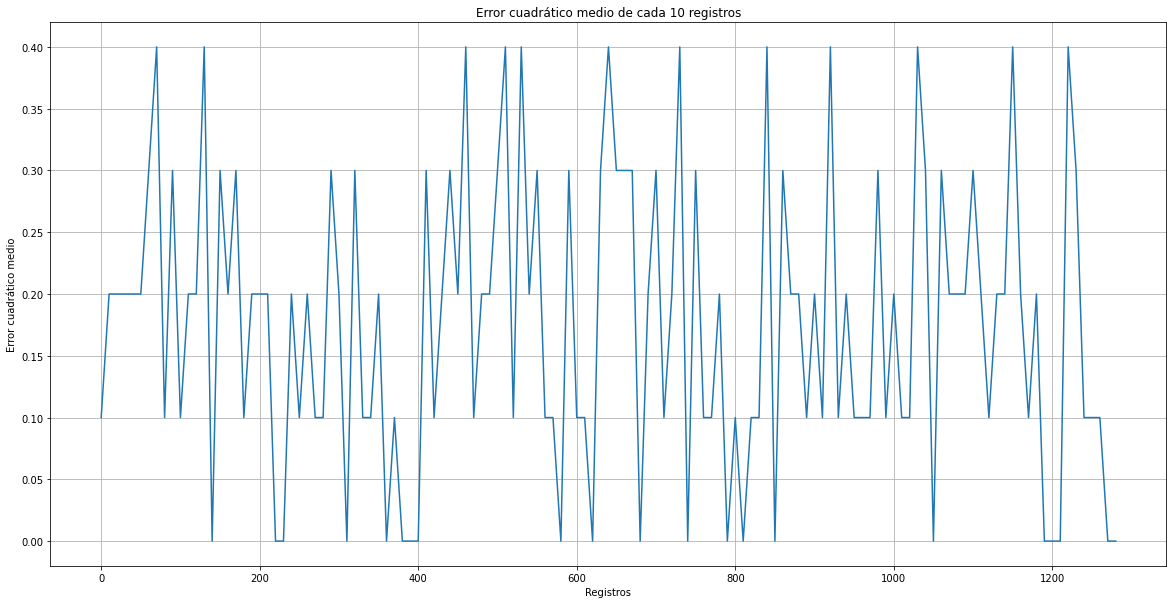

In [32]:
#Gráficar el error
plt.figure(figsize=(20, 10))
sns.lineplot(x=range(0, len(X_test_scaled), 10), y=errores_list)
plt.title("Error cuadrático medio de cada 10 registros")
#Linewidth
plt.rcParams['lines.linewidth'] = 1
plt.ylabel('Error cuadrático medio')
plt.xlabel('Registros')
plt.xticks(fontsize=10)
plt.grid()
plt.show()